# MLR Assignment: BoomBikes

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### Objective:
Company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1) Which variables are significant in predicting the demand for shared bikes.
2) How well those variables describe the bike demands

In [4]:
# Importing Necessary Lib
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### STEPS WHICH WE FOLLOW
- Reading, understanding the data and visulization
- prepare the Data for modeling ( train-test split, rescaling etc)
- training The Model
- residual analysis
- prediction and evaluation on test set

### STEP 1: Reading, understanding the data

In [7]:
# Read the data
bikes=pd.read_csv(r"C:\Users\eesw019\Juypyter_Files_Upgrad\Python_main_course\MLR_Assignment\day.csv")

In [8]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bikes.shape

(730, 16)

In [10]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping non relevant column for analysis

In [13]:
# Drop the Index, Date column as this is not making sense, Additionally casual and registered are nothing but cnt hence need to delete 
bikes=bikes.drop(['instant','dteday','casual','registered'],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Mapping of some features like season, mnth, weekday, weathersit  to its origianl meaning
bikes['season']=bikes['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikes['weathersit']=bikes['weathersit'].map({1:'Clear_Few_clouds',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})
bikes['mnth']=bikes['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes['weekday']=bikes['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'})

In [15]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear_Few_clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thu,1,Clear_Few_clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear_Few_clouds,9.305237,11.46350,43.6957,12.522300,1600


### STEP2: EDA (Data Visualization)

In [17]:
# As we have seen there is no any column contains null values. hence now we can move to visualize the data.
# this will help us to understand whether features are linear regression with target var or not

In [18]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

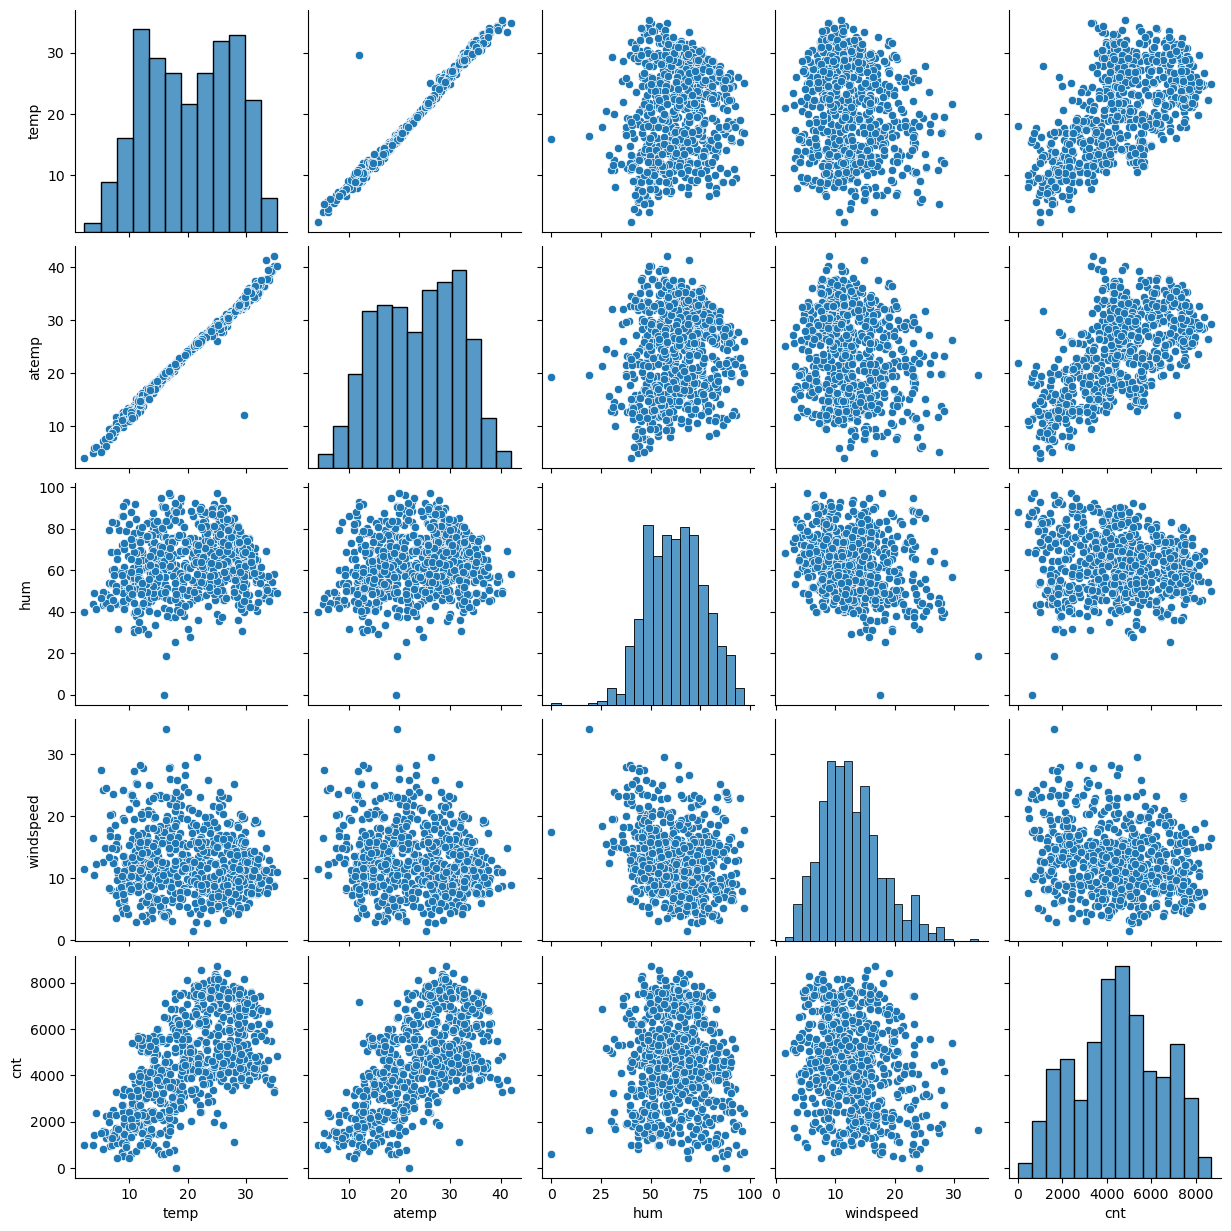

In [19]:
# Univariate Analysis:
# Let's analyze first numerical var
num_df=bikes[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(num_df)

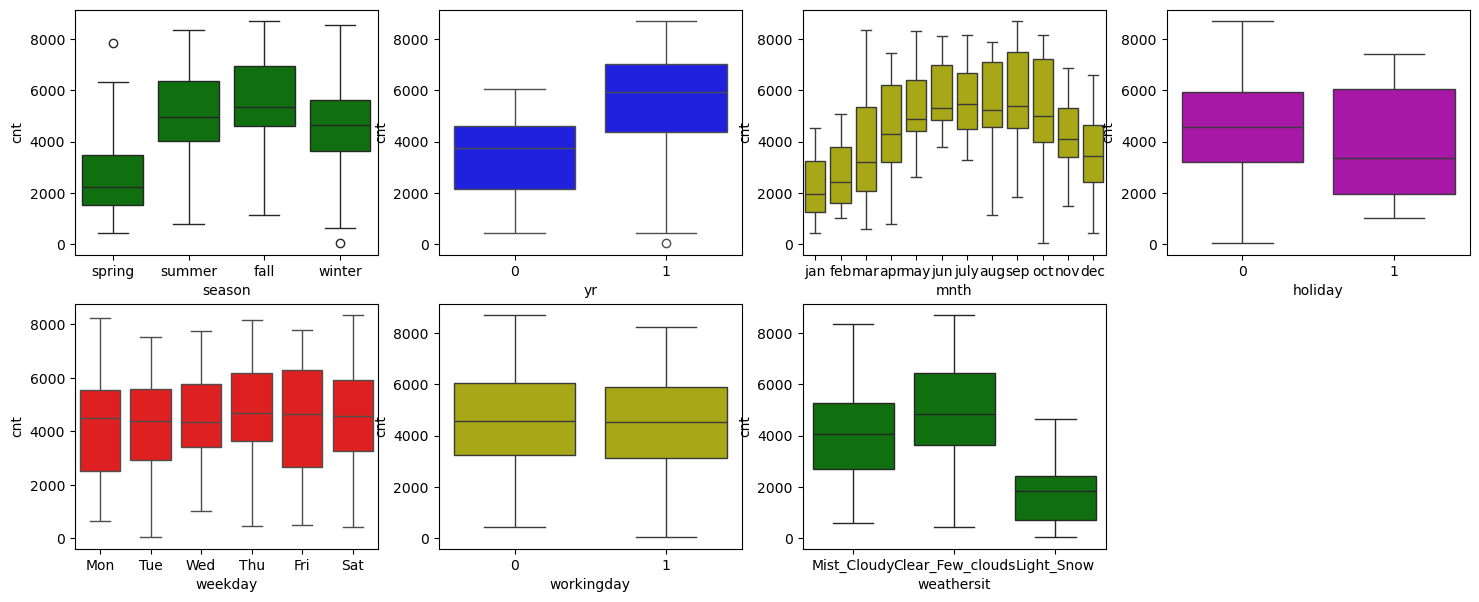

In [20]:
# Analyzing the categorical var
df_cat=bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']]
plt.figure(figsize=(18,7))
plt.subplot(2,4,1)
sns.boxplot(data=bikes,x='season',y='cnt',color='g')
plt.subplot(2,4,2)
sns.boxplot(data=bikes,x='yr',y='cnt',color='b')
plt.subplot(2,4,3)
sns.boxplot(data=bikes,x='mnth',y='cnt',color='y')
plt.subplot(2,4,4)
sns.boxplot(data=bikes,x='holiday',y='cnt',color='m')
plt.subplot(2,4,5)
sns.boxplot(data=bikes,x='weekday',y='cnt',color='r')
plt.subplot(2,4,6)
sns.boxplot(data=bikes,x='workingday',y='cnt',color='y')
plt.subplot(2,4,7)
sns.boxplot(data=bikes,x='weathersit',y='cnt',color='g')
plt.show()

Observation: During univariate and bivariate analysis, it is clearly seen that we there is linear relationship between target var and some of the features. Hence, it make sence to move ahead for MLR.
IMP: One of the important observation is that atemp and temp columns have high correlation. hence we need to get rid out of at least one of it.
Let's drop this cal.

### STEP 2: Prepare the Data for modeling ( train-test split, rescaling etc)

### Encoding
1) Converting Binary to 0 or 1
2) Creating Dummy Variables
### Splitting into Train-Test Data Sets
1) rescaling of Train dataset

#### Here we need to convert categorical var to dummy var for further MLR analysis

In [25]:
temp=pd.get_dummies(bikes[['season', 'mnth', 'weekday','weathersit']],drop_first=1,dtype=int)
temp.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_mar,...,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
bikes=pd.concat([bikes,temp],axis=1)

In [27]:
bikes.drop(['season', 'mnth', 'weekday','weathersit'],axis=1,inplace=True)

In [28]:
# Dropping this column because atemp and temp are highly correlated with each other as seen in pairplot
bikes.drop(['temp'],axis=1,inplace=True)

In [29]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Splitting into Train-Test Data Sets
df_train,df_test=train_test_split(bikes,train_size=0.7,random_state=98)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


#### Rescaling:

We will use MinMaxscaler method to normalize the data

In [33]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [34]:
# rescaling ( Min-Max)

# 1. Create the Object
scaler= MinMaxScaler()

# List of Numerical var
num_var=['atemp', 'hum', 'windspeed']
# fit the data
# scaler.fit()
# scaler.transform()
# scaler.fit_transform()
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [35]:
# Describe the data to check wheather Normalization has performed well or not.
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.517647,0.025490,0.701961,0.518143,0.508084,0.404276,4457.350980,0.264706,0.233333,0.231373,...,0.070588,0.086275,0.078431,0.147059,0.139216,0.135294,0.145098,0.152941,0.031373,0.352941
std,0.500179,0.157763,0.457846,0.218751,0.201449,0.188363,1960.943463,0.441610,0.423368,0.422124,...,0.256387,0.281045,0.269113,0.354512,0.346511,0.342373,0.352545,0.360284,0.174494,0.478354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.334977,0.348834,0.268526,2932.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.519376,0.504187,0.380548,4459.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.699630,0.656998,0.508504,5902.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### STEP 3: Training The data

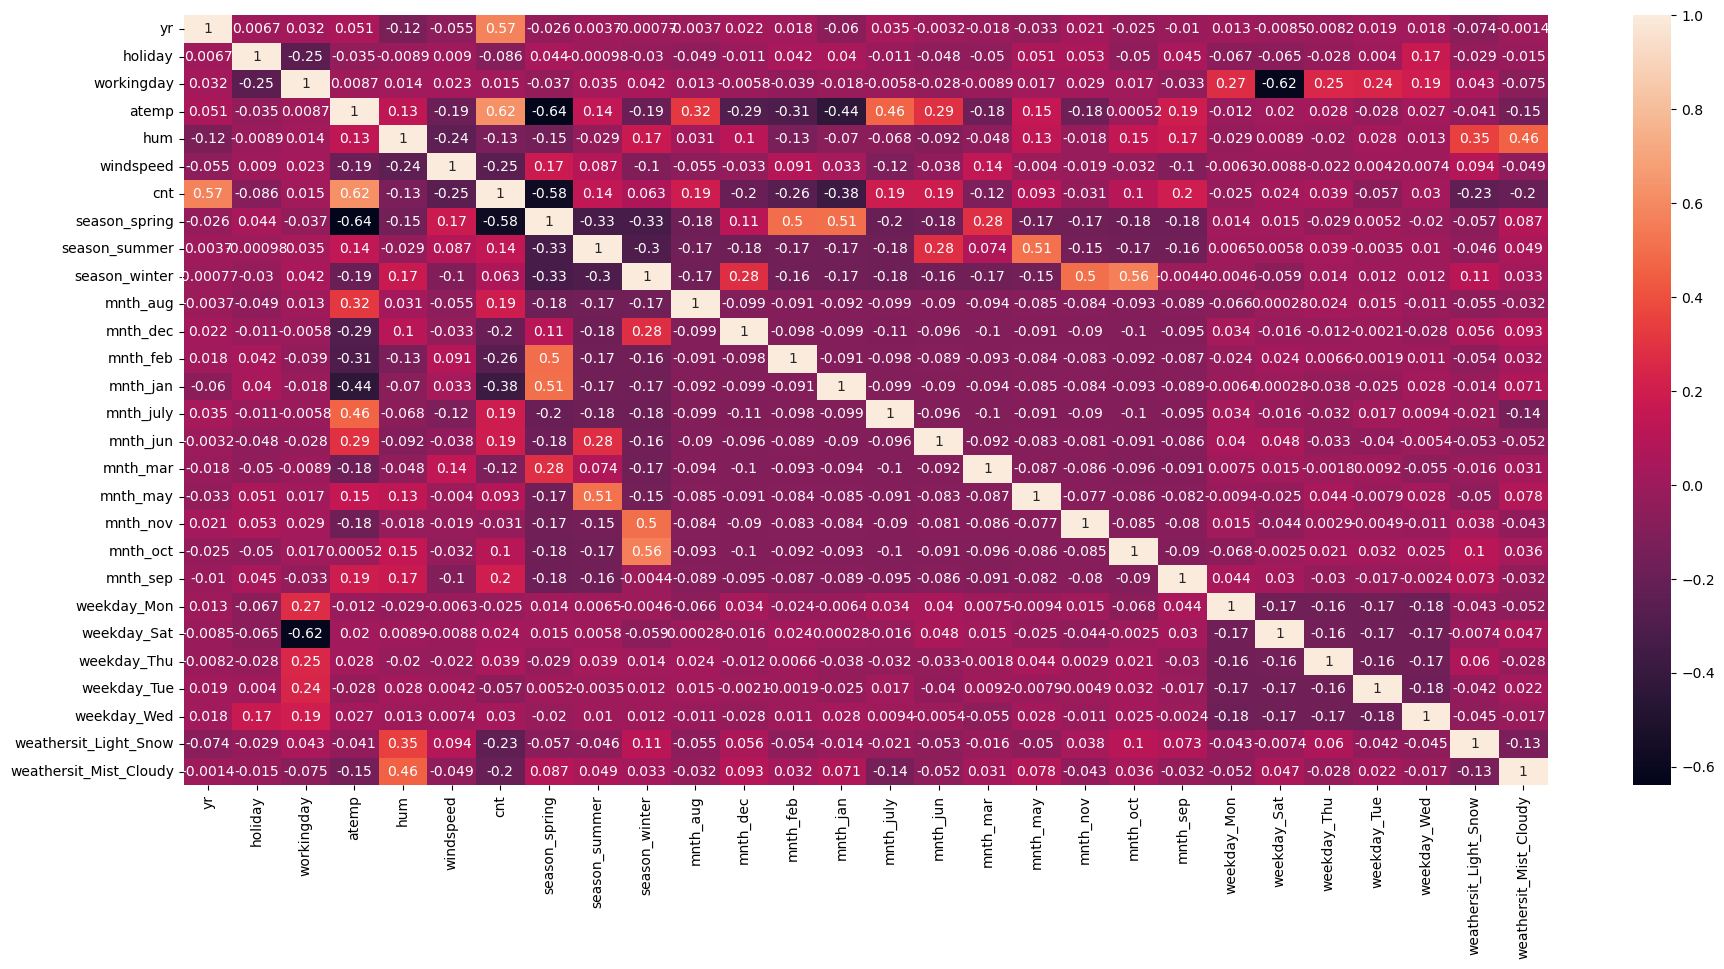

In [37]:
# To check the correlation

plt.figure(figsize=(22,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [38]:
# Create X and y variables 
y_train=df_train.pop('cnt')
X_train=df_train

## Feature_Selection_Approach: we will follow hybrid method using RFE + Manual
1) RFE
2) Manual Based on (P-value) & VIF significance

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 8),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 12),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 9),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create first Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.73e-185
Time:                        20:39:27   Log-Likelihood:                -4122.2
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     494   BIC:                             8344.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3222

### VIF

In [49]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
3,hum,14.17
2,atemp,12.60
4,windspeed,4.82
5,season_spring,4.44
6,season_winter,2.57
14,weathersit_Mist_Cloudy,2.56
9,mnth_jan,2.17
0,yr,2.09
8,mnth_feb,2.08
7,mnth_dec,1.70


"hum" column is looks highly correlated with other var, and hence we can drop this base on VIF value

In [51]:
X_train_rfe = X_train_rfe.drop('hum',axis=1)

In [52]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create second Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          7.70e-183
Time:                        20:39:27   Log-Likelihood:                -4131.3
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     495   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2874

In [53]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,atemp,5.43
3,windspeed,4.76
4,season_spring,4.16
5,season_winter,2.36
8,mnth_jan,2.13
7,mnth_feb,2.08
0,yr,2.06
6,mnth_dec,1.65
10,mnth_nov,1.65
13,weathersit_Mist_Cloudy,1.58


In [54]:
# now, looks like feb_month feature as less significant. lets drop it

In [55]:
X_train_rfe = X_train_rfe.drop('mnth_feb',axis=1)

In [56]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create 3rd Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.11e-182
Time:                        20:39:27   Log-Likelihood:                -4134.4
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2764

In [57]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,atemp,5.40
3,windspeed,4.76
4,season_spring,2.44
5,season_winter,2.30
0,yr,2.06
9,mnth_nov,1.63
12,weathersit_Mist_Cloudy,1.58
7,mnth_jan,1.55
8,mnth_july,1.49
6,mnth_dec,1.46


In [58]:
# Month_jan looks less significant. hence drop it

In [59]:
X_train_rfe = X_train_rfe.drop('mnth_jan',axis=1)

In [60]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create 4th Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          6.11e-183
Time:                        20:39:27   Log-Likelihood:                -4136.5
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2628

In [61]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,atemp,5.35
3,windspeed,4.75
5,season_winter,2.27
0,yr,2.06
4,season_spring,1.88
8,mnth_nov,1.62
11,weathersit_Mist_Cloudy,1.57
7,mnth_july,1.49
6,mnth_dec,1.40
9,mnth_sep,1.21


In [62]:
# looks like Month_sep is less significant, hence drop it

In [63]:
X_train_rfe = X_train_rfe.drop('mnth_sep',axis=1)

In [64]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create 5th Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.06e-181
Time:                        20:39:27   Log-Likelihood:                -4142.3
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     498   BIC:                             8359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2652

In [65]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,atemp,4.93
3,windspeed,4.72
5,season_winter,2.27
0,yr,2.06
4,season_spring,1.88
8,mnth_nov,1.61
10,weathersit_Mist_Cloudy,1.57
7,mnth_july,1.42
6,mnth_dec,1.39
9,weathersit_Light_Snow,1.09


In [66]:
# holiday has high vif, lets drop it

In [67]:
X_train_rfe = X_train_rfe.drop('holiday',axis=1)

In [68]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create 6th Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          2.72e-180
Time:                        20:39:27   Log-Likelihood:                -4148.4
No. Observations:                 510   AIC:                             8319.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2624

In [69]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,atemp,4.93
2,windspeed,4.72
4,season_winter,2.27
0,yr,2.06
3,season_spring,1.87
7,mnth_nov,1.60
9,weathersit_Mist_Cloudy,1.57
6,mnth_july,1.42
5,mnth_dec,1.39
8,weathersit_Light_Snow,1.09


In [70]:
# we can drop windspeed as it shows VIF

In [71]:
X_train_rfe = X_train_rfe.drop('windspeed',axis=1)

In [72]:
# add constant
X_train_sm=sm.add_constant(X_train_rfe)

# create 7th Model
lr=sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

#parmas
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          4.05e-177
Time:                        20:39:27   Log-Likelihood:                -4158.8
No. Observations:                 510   AIC:                             8338.
Df Residuals:                     500   BIC:                             8380.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2122

In [73]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,atemp,2.76
3,season_winter,2.24
0,yr,2.05
6,mnth_nov,1.58
8,weathersit_Mist_Cloudy,1.57
4,mnth_dec,1.39
5,mnth_july,1.39
2,season_spring,1.37
7,weathersit_Light_Snow,1.06


In [74]:
# X_train_rfe = X_train_rfe.drop('mnth_nov',axis=1)

In [75]:
# # add constant
# X_train_sm=sm.add_constant(X_train_rfe)

# # create second Model
# lr=sm.OLS(y_train,X_train_sm)

# # fit the model
# lr_model=lr.fit()

# #parmas
# print(lr_model.summary())

In [76]:
# vif=pd.DataFrame()
# vif['features']=X_train_rfe.columns
# vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

## STEP 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [78]:
y_train_pred= lr_model.predict(X_train_sm)
y_train_pred.head()

533    5814.418201
710    4668.045637
591    6987.557085
267    4497.510803
434    4333.473066
dtype: float64

In [79]:
res=(y_train_pred-y_train)

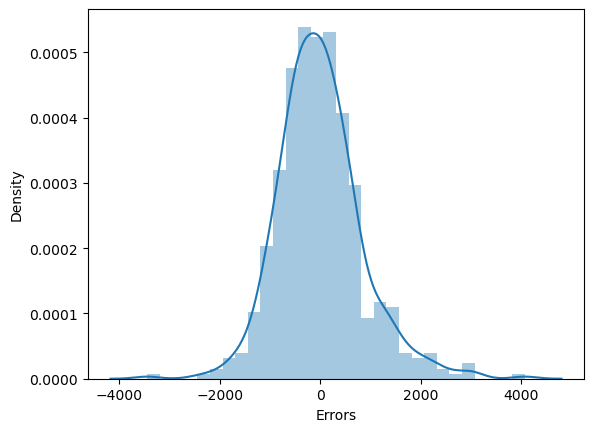

In [80]:
plt.figure()
sns.distplot(res, bins=30)
plt.xlabel("Errors")
plt.show()

In [81]:
# Homoscedasticity

<Axes: >

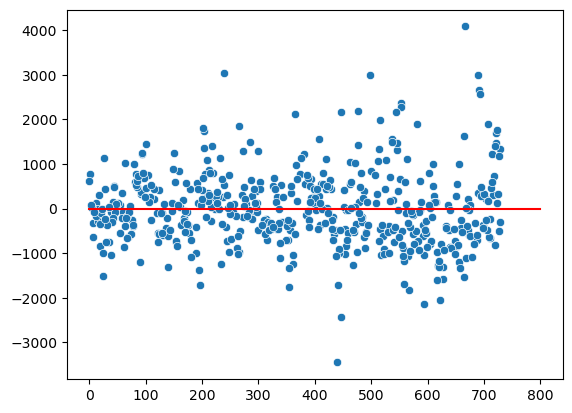

In [82]:
sns.scatterplot(res)
sns.lineplot(x=[0,800],y=[0,0],color='r')

## STEP 5: Predication and Evaluate Model on Test set

In [84]:

# List of Numerical var
num_var=['atemp', 'hum', 'windspeed']
# fit the data
# scaler.fit()
# scaler.transform()
# scaler.fit_transform()
df_test[num_var]=scaler.transform(df_test[num_var])

In [85]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
56,0,0,1,0.266626,0.376197,0.391676,1969,1,0,0,...,0,0,0,1,0,0,0,0,0,0
624,1,0,1,0.622163,0.658493,0.308586,6869,0,0,0,...,0,0,1,0,0,0,1,0,0,1
158,0,0,1,0.850862,0.497009,0.272980,4401,0,1,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,1,0.733185,0.340909,0.172105,5305,0,0,0,...,0,0,0,0,0,0,1,0,0,0
268,0,0,1,0.669408,0.821770,0.210674,4630,0,0,1,...,0,0,1,0,0,0,0,1,0,1


In [86]:
# prediction on Test data
# create Y_test and ,X_test data set

y_test=df_test.pop('cnt')
X_test=df_test

In [87]:
# add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
56,1.0,0,0,1,0.266626,0.376197,0.391676,1,0,0,...,0,0,0,1,0,0,0,0,0,0
624,1.0,1,0,1,0.622163,0.658493,0.308586,0,0,0,...,0,0,1,0,0,0,1,0,0,1
158,1.0,0,0,1,0.850862,0.497009,0.272980,0,1,0,...,0,0,0,0,0,0,0,0,0,0
176,1.0,0,0,1,0.733185,0.340909,0.172105,0,0,0,...,0,0,0,0,0,0,1,0,0,0
268,1.0,0,0,1,0.669408,0.821770,0.210674,0,0,1,...,0,0,1,0,0,0,0,1,0,1


In [88]:
col_list=X_train_rfe.columns.to_list()
col_list

['yr',
 'atemp',
 'season_spring',
 'season_winter',
 'mnth_dec',
 'mnth_july',
 'mnth_nov',
 'weathersit_Light_Snow',
 'weathersit_Mist_Cloudy']

In [89]:
# as in final model we dont have all the col, hence we need to remove those col which are not in model
X_test_sm=X_test_sm[col_list]
X_test_sm.head()

,yr,atemp,season_spring,season_winter,mnth_dec,mnth_july,mnth_nov,weathersit_Light_Snow,weathersit_Mist_Cloudy
56,0,0.266626,1,0,0,0,0,0,0
624,1,0.622163,0,0,0,0,0,0,1
158,0,0.850862,0,0,0,0,0,0,0
176,0,0.733185,0,0,0,0,0,0,0
268,0,0.669408,0,1,0,0,0,0,1


In [90]:
X_test_sm=sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,atemp,season_spring,season_winter,mnth_dec,mnth_july,mnth_nov,weathersit_Light_Snow,weathersit_Mist_Cloudy
56,1.0,0,0.266626,1,0,0,0,0,0,0
624,1.0,1,0.622163,0,0,0,0,0,0,1
158,1.0,0,0.850862,0,0,0,0,0,0,0
176,1.0,0,0.733185,0,0,0,0,0,0,0
268,1.0,0,0.669408,0,1,0,0,0,0,1


In [91]:
# predication
y_test_pred=lr_model.predict(X_test_sm)

In [92]:
# Model Evaluation:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.820829424649093

Text(0, 0.5, 'y_test_pred')

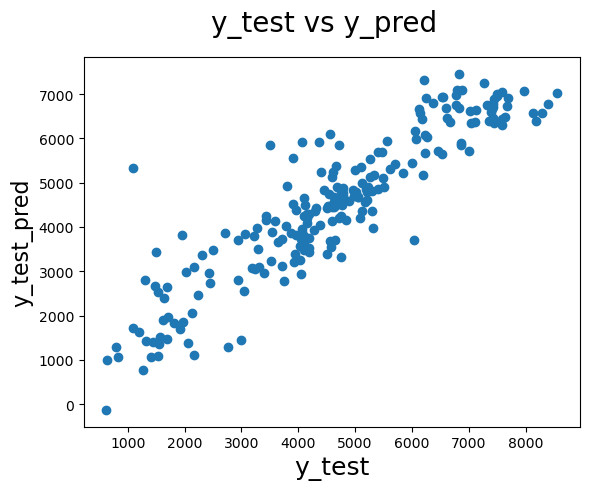

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [94]:
res=(y_test_pred-y_test)

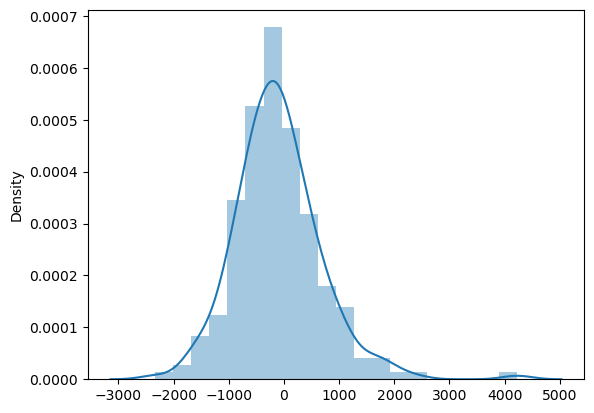

In [95]:
plt.figure()
sns.distplot(res, bins=20)
plt.show()

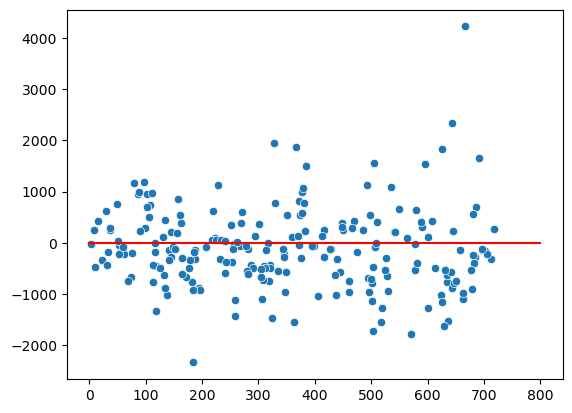

In [96]:
plt.figure()
sns.scatterplot(res)
sns.lineplot(x=[0,800],y=[0,0],color='r')
plt.show()

### Hence, Data Analysis done by MLR Now answer the questions:





In [98]:
print("Q1 Ans- Following variables are significant in predicting the demand for shared bikes:")
lr_model.params

Q1 Ans- Following variables are significant in predicting the demand for shared bikes:


const                     2122.442188
yr                        2093.309764
atemp                     3672.615744
season_spring            -1234.998412
season_winter              642.408119
mnth_dec                  -595.612414
mnth_july                 -599.137244
mnth_nov                  -737.893962
weathersit_Light_Snow    -2493.144036
weathersit_Mist_Cloudy    -646.731192
dtype: float64

In [99]:
# Checking The r squre for the train and test data using the final model
# Q2 Ans-  with 82% explanation these variables describe the bike demands

In [100]:
print("R Square for test Dataset: ", r2_score(y_true=y_train,y_pred=y_train_pred))
print("R Square for test Dataset: ", r2_score(y_true=y_test,y_pred=y_test_pred))

R Square for test Dataset:  0.8153706537715995
R Square for test Dataset:  0.820829424649093
